In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read data from csv files
vein_data = pd.read_csv('./data/vein.csv')
earLobe_data = pd.read_csv('./data/earLobe.csv')
innerArm_data = pd.read_csv('./data/innerArm.csv')
thumbNail_data = pd.read_csv('./data/thumbNail.csv')

In [3]:
#Determine features and target of data
X_vein = vein_data.iloc[1:21,2:]
y_vein = vein_data.iloc[1:21, 1]
X_earLobe = earLobe_data.iloc[1:21,2:]
y_earLobe = earLobe_data.iloc[1:21, 1]
X_innerArm = innerArm_data.iloc[1:21,2:]
y_innerArm = innerArm_data.iloc[1:21, 1]
X_thumbNail = thumbNail_data.iloc[1:21,2:]
y_thumbNail = thumbNail_data.iloc[1:21, 1]

In [4]:
#Split testing and Training data
X_vein_train, x_vein_test, y_vein_train, Y_vein_test = train_test_split(X_vein, y_vein, test_size=0.20, random_state=42)
X_earLobe_train, x_earLobe_test, y_earLobe_train, Y_earLobe_test = train_test_split(X_earLobe, y_earLobe, test_size=0.20, random_state=42)
X_innerArm_train, x_innerArm_test, y_innerArm_train, Y_innerArm_test = train_test_split(X_innerArm, y_innerArm, test_size=0.20, random_state=42)
X_thumbNail_train, x_thumbNail_test, y_thumbNail_train, Y_thumbNail_test = train_test_split(X_thumbNail, y_thumbNail, test_size=0.20, random_state=42)

In [5]:
# Models
model_SVC = SVC(kernel='linear', C=1)
model_DT = DecisionTreeClassifier(class_weight='balanced')
model_NB = GaussianNB()
model_LR = LogisticRegression(random_state=0, multi_class='multinomial', max_iter=1000)
model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
model_BC = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
model_VC = VotingClassifier(estimators=[('SVC', model_SVC), ('NB', model_NB), ('LR', model_LR), ('DT', model_DT)],voting='hard')
model_RF = RandomForestClassifier(random_state=0)

In [6]:
#PCA
accuracy_vein = []
accuracy_earLobe = []
accuracy_innerArm = []
accuracy_thumbNail = []
features = [] 
for i in range(15):
    pca = PCA(n_components=(i+1))
    X_vein_train_pca = pca.fit_transform(X_vein_train)
    x_vein_test_pca = pca.transform(x_vein_test)
    X_earLobe_train_pca = pca.fit_transform(X_earLobe_train)
    x_earLobe_test_pca = pca.transform(x_earLobe_test)
    X_innerArm_train_pca = pca.fit_transform(X_innerArm_train)
    x_innerArm_test_pca = pca.transform(x_innerArm_test)
    X_thumbNail_train_pca = pca.fit_transform(X_thumbNail_train)
    x_thumbNail_test_pca = pca.transform(x_thumbNail_test)
    model_SVC.fit(X_vein_train_pca, y_vein_train)
    accuracy_vein.append(accuracy_score(Y_vein_test, model_SVC.predict(x_vein_test_pca))*100)
    model_SVC.fit(X_earLobe_train_pca, y_earLobe_train)
    accuracy_earLobe.append(accuracy_score(Y_earLobe_test, model_SVC.predict(x_earLobe_test_pca))*100)
    model_SVC.fit(X_innerArm_train_pca, y_innerArm_train)
    accuracy_innerArm.append(accuracy_score(Y_innerArm_test, model_SVC.predict(x_innerArm_test_pca))*100)
    model_SVC.fit(X_thumbNail_train_pca, y_thumbNail_train)
    accuracy_thumbNail.append(accuracy_score(Y_thumbNail_test, model_SVC.predict(x_thumbNail_test_pca))*100)
    features.append(i+1)

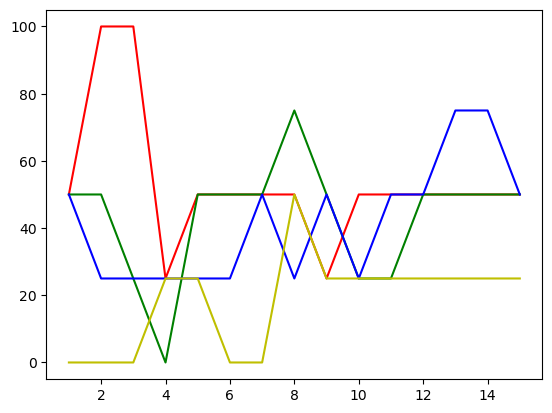

In [7]:
#Plotting
plt.plot(features, accuracy_vein, color='r', label='vein')
plt.plot(features, accuracy_earLobe, color='g', label='ear lobe')
plt.plot(features, accuracy_innerArm, color='b', label='inner arm')
plt.plot(features, accuracy_thumbNail, color='y', label='thumb nail')
plt.show()

In [8]:
#PCA to optimal n-components
pca = PCA(n_components = 2)
X_vein_train_pca = pca.fit_transform(X_vein_train)
x_vein_test_pca = pca.transform(x_vein_test)
pca = PCA(n_components = 8)
X_earLobe_train_pca = pca.fit_transform(X_earLobe_train)
x_earLobe_test_pca = pca.transform(x_earLobe_test)
pca = PCA(n_components = 13)
X_innerArm_train_pca = pca.fit_transform(X_innerArm_train)
x_innerArm_test_pca = pca.transform(x_innerArm_test)
pca = PCA(n_components = 8)
X_thumbNail_train_pca = pca.fit_transform(X_thumbNail_train)
x_thumbNail_test_pca = pca.transform(x_thumbNail_test)

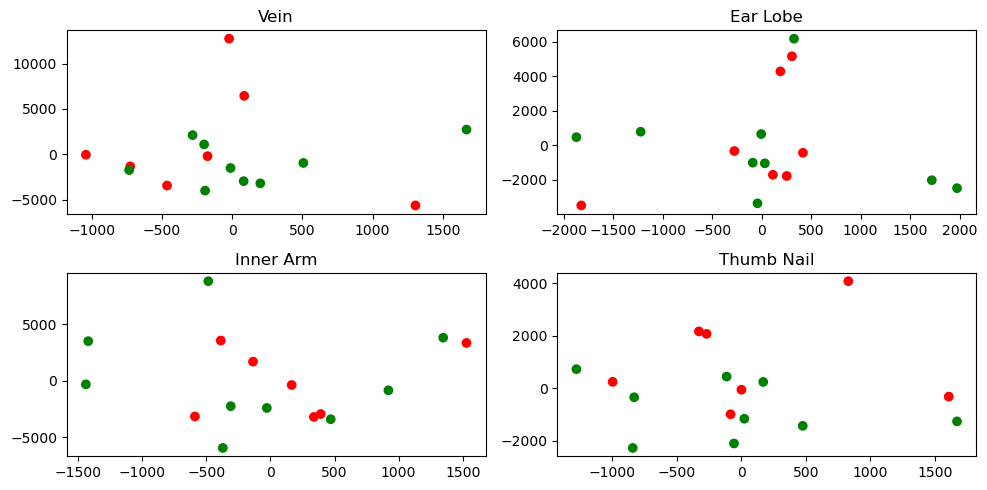

In [11]:
#plot data
label_vein = y_vein_train
color_vein= ['red' if l == 0 else 'green' for l in label_vein]

label_earLobe = y_earLobe_train
color_earLobe= ['red' if l == 0 else 'green' for l in label_earLobe]

label_innerArm = y_innerArm_train
color_innerArm= ['red' if l == 0 else 'green' for l in label_innerArm]

label_thumbNail = y_thumbNail_train
color_thumbNail= ['red' if l == 0 else 'green' for l in label_thumbNail]

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 5))
ax1.scatter(X_vein_train_pca[:,1], X_vein_train_pca[:,0], color=color_vein)
ax1.set_title('Vein')
ax2.scatter(X_earLobe_train_pca[:,1], X_earLobe_train_pca[:,0], color=color_earLobe)
ax2.set_title('Ear Lobe')
ax3.scatter(X_innerArm_train_pca[:,1], X_innerArm_train_pca[:,0], color=color_innerArm)
ax3.set_title('Inner Arm')
ax4.scatter(X_thumbNail_train_pca[:,1], X_thumbNail_train_pca[:,0], color=color_thumbNail)
ax4.set_title('Thumb Nail')
fig.tight_layout()

In [ ]:
#Results of SVM
model_SVC.fit(X_vein_train_pca, y_vein_train)
print("vein: "+str(accuracy_score(Y_vein_test, model_SVC.predict(x_vein_test_pca))*100))
model_SVC.fit(X_earLobe_train_pca, y_earLobe_train)
print("earLobe: "+str(accuracy_score(Y_earLobe_test, model_SVC.predict(x_earLobe_test_pca))*100))
model_SVC.fit(X_innerArm_train_pca, y_innerArm_train)
print("inner arm: "+str(accuracy_score(Y_innerArm_test, model_SVC.predict(x_innerArm_test_pca))*100))
model_SVC.fit(X_thumbNail_train_pca, y_thumbNail_train)
print("thumb nail: "+str(accuracy_score(Y_thumbNail_test, model_SVC.predict(x_thumbNail_test_pca))*100))

In [ ]:
#Results of Gradient Boosting
model_GB.fit(X_vein_train, y_vein_train)
print("vein: "+str(accuracy_score(Y_vein_test, model_GB.predict(x_vein_test))*100))
model_GB.fit(X_earLobe_train, y_earLobe_train)
print("earLobe: "+str(accuracy_score(Y_earLobe_test, model_GB.predict(x_earLobe_test))*100))
model_GB.fit(X_innerArm_train, y_innerArm_train)
print("inner arm: "+str(accuracy_score(Y_innerArm_test, model_GB.predict(x_innerArm_test))*100))
model_GB.fit(X_thumbNail_train, y_thumbNail_train)
print("thumb nail: "+str(accuracy_score(Y_thumbNail_test, model_GB.predict(x_thumbNail_test))*100))

In [ ]:
#Results of Voting Classifier
model_VC = VotingClassifier(estimators=[('SVC', model_SVC), ('NB', model_NB), ('LR', model_LR), ('DT', model_DT)],voting='hard')

model_VC.fit(X_vein_train, y_vein_train)
print("vein: "+str(accuracy_score(Y_vein_test, model_VC.predict(x_vein_test))*100))

model_VC.fit(X_earLobe_train, y_earLobe_train)
print("earLobe: "+str(accuracy_score(Y_earLobe_test, model_VC.predict(x_earLobe_test))*100))

model_VC.fit(X_innerArm_train, y_innerArm_train)
print("inner arm: "+str(accuracy_score(Y_innerArm_test, model_VC.predict(x_innerArm_test))*100))


model_VC.fit(X_thumbNail_train, y_thumbNail_train)
print("thumb nail: "+str(accuracy_score(Y_thumbNail_test, model_VC.predict(x_thumbNail_test))*100))

In [ ]:
#Bagging Classifier
model_BC.fit(X_vein_train, y_vein_train)
print("vein: "+str(accuracy_score(Y_vein_test, model_BC.predict(x_vein_test))*100))

model_BC.fit(X_earLobe_train, y_earLobe_train)
print("earLobe: "+str(accuracy_score(Y_earLobe_test, model_BC.predict(x_earLobe_test))*100))

model_BC.fit(X_innerArm_train, y_innerArm_train)
print("inner arm: "+str(accuracy_score(Y_innerArm_test, model_BC.predict(x_innerArm_test))*100))

model_BC.fit(X_thumbNail_train, y_thumbNail_train)
print("thumb nail: "+str(accuracy_score(Y_thumbNail_test, model_BC.predict(x_thumbNail_test))*100))

In [ ]:
#Random forest Classifier

model_RF.fit(X_vein_train, y_vein_train)
print("vein: "+str(accuracy_score(Y_vein_test, model_RF.predict(x_vein_test))*100))

model_RF.fit(X_earLobe_train, y_earLobe_train)
print("earLobe: "+str(accuracy_score(Y_earLobe_test, model_RF.predict(x_earLobe_test))*100))

model_RF.fit(X_innerArm_train, y_innerArm_train)
print("inner arm: "+str(accuracy_score(Y_innerArm_test, model_RF.predict(x_innerArm_test))*100))

model_RF.fit(X_thumbNail_train, y_thumbNail_train)
print("thumb nail: "+str(accuracy_score(Y_thumbNail_test, model_RF.predict(x_thumbNail_test))*100))